# Setup and correlations between metrics

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *


In [ ]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('Helvetica', 6)
plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure1/'
with open(picklepath+ 'W1118Dark_e.pickle', 'rb') as f:
            W1118Dark_e = pickle.load(f)
with open(picklepath + 'W1118Dark_ele.pickle', 'rb') as f:
            W1118Dark_ele = pickle.load(f)
W1118Dark_ele.outputFolder = imagepath + '/W1118Dark/'
cm = W1118Dark_ele.cm

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_74101/3301051591.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_74101/3301051591.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


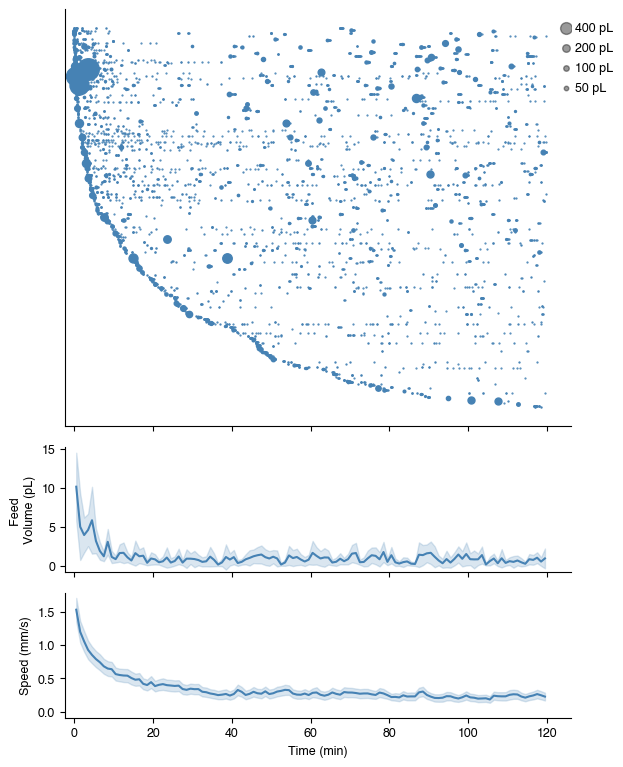

In [ ]:
setFont('Helvetica', 9)
W1118Dark_ele.feedsRevisedDf['Starved hrs'] = W1118Dark_ele.feedsRevisedDf['Starved hrs'].dropna().astype('str')
WTStarvedPalette = {0:sns.color_palette("magma")[5], 24:sns.color_palette("magma")[3], 48:sns.color_palette("magma")[1]}

a, b, c = W1118Dark_ele.plotStacked(endMin = 120, metricsToStack = ['Volume', 'Speed'], colorBy = 'Status', 
                          customPalette = {'Ctrl': 'Steelblue'}, 
                                    figsize = [16*cm, 20*cm], dotratio = 30, plotNonFeeders=False, dotbase=1, )
[a.axes[i].grid(visible=None) for i in range(-3, -1)]
a.savefig(W1118Dark_ele.outputFolder+'/stacked.svg')

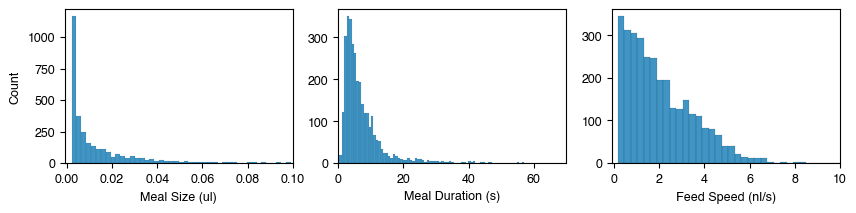

In [ ]:
setFont('Helvetica', 9)
f, axes = plt.subplots(1, 3)
f.set_size_inches(10, 2)
setFont('Helvetica', 9)

sns.histplot(W1118Dark_ele.feedsRevisedDf['FeedVol_µl'], ax = axes[0])
axes[0].set_xlim(-0.001, 0.1)
axes[0].set_xlabel('Meal Size (ul)')

sns.histplot(W1118Dark_ele.feedsRevisedDf['FeedDuration_s'], ax = axes[1])
axes[1].set_xlim(-0.01, 70)
axes[1].set_ylabel('')
axes[1].set_xlabel('Meal Duration (s)')

sns.histplot(W1118Dark_ele.feedsRevisedDf['FeedSpeed_nl/s'], ax = axes[2])
axes[2].set_xlim(-0.1, 10)
axes[2].set_ylabel('')
axes[2].set_xlabel('Feed Speed (nl/s)')
f.savefig(W1118Dark_ele.outputFolder+'/hists.svg', bbox_inches='tight', pad_inches=0)

## W1118Dark_ele.feedsRevisedDf['Starvation'] = W1118Dark_ele.feedsRevisedDf['Starved hrs'].dropna().astype('str')


In [ ]:
## from svgutils.compose import *

Figure("22cm", "18cm", 
    Panel(SVG(figurepath + 'cartoons/setup.svg').scale(0.02),
    Text("A", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(1, 1),
    Panel(SVG(figurepath + 'cartoons/caplevel.svg').scale(0.045),
    Text("C", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(1, 7.5),
    Panel(SVG(figurepath + 'cartoons/egtrace.svg').scale(0.035),
    Text("D", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(8.5, 7.5),
    Panel(SVG(W1118Dark_ele.outputFolder+'stacked.svg').scale(0.022),
    Text("E", 0.2, 0.2, size=0.6, font= 'Helvetica', weight='bold'), 
    Text("F", 0.2, 7.5, size=0.6, font= 'Helvetica', weight='bold'),
    Text("G", 0.2, 9.8, size=0.6, font= 'Helvetica', weight='bold')).move(11, 1),
    Panel(SVG(figurepath + 'cartoons/chipcartoon.svg').scale(0.02),
    Text("B", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(7.5, 1),
    Panel(SVG(W1118Dark_ele.outputFolder+'/hists.svg').scale(0.031),
    Text("H", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold'),     
    Text("I", 6.5, 0.2, size=0.6, font= 'Helvetica', weight='bold'),
    Text("J", 13, 0.2, size=0.6, font= 'Helvetica', weight='bold')).move(1, 13.5),

      ).save(figurepath+"/Figure1.svg")



## Figure 2

In [ ]:
color1 = 'green'
color2 = 'purple'

metricType = {'Starvation':'k', 'Meal Size': color1, 'Feed Speed': color1, 
              'Prefeed Speed': color2,
       'Duringfeed Speed': color1, 'Postfeed Speed': color2, 
              'Meal Duration': color1, 'Volume': color1,
       'Count': color1, 'Duration': color1, 'Latency': color2, 
              'Duringfeed Speed Ratio': color2,
       'Perifeed Speed Ratio': color2, 'Speed': color2, 
              'Height': color2, 'Food Port Occupancy': color2,
       'Ctrl Port Occupancy': color2, 'Falls': color2}

def corrWith(data, sortMetric, metricType, abs = False):
    setFont('Helvetica', 8)

    corr_matrix = data.corr()
    if abs:
        cmap = 'Blues'
        corr_matrix = np.abs(corr_matrix)
        vmin = 0
    else:
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        vmin=-1
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    cm2 = corr_matrix.sort_values(by = sortMetric, ascending = False)
    fig, ax = plt.subplots(figsize=(5,4.5)) 
    sns.heatmap(cm2[cm2.index],ax = ax, annot=False, cmap = cmap, mask=mask, vmax = 1, vmin = vmin)
    for i in range(len(cm2.index)):
        ax.get_xticklabels()[i].set_color(metricType[cm2.index[i]])
        ax.get_yticklabels()[i].set_color(metricType[cm2.index[i]])
    plt.tight_layout()

    return fig, ax, cm2

In [ ]:

w1118 = pd.read_csv(picklepath + 'W1118Dark_ele.csv')
w1118['Starvation'] = w1118['Starvation'].astype('str')
w1118['Volume'] = w1118['Volume']*1000
w1118['Meal Size'] = w1118['Meal Size']*1000
w1118['Feed Speed'] = w1118['Feed Speed']*1000
data_num0 = w1118.loc[w1118['Starvation']==0]
data_num24 = w1118.loc[w1118['Starvation']==24]
data_num48 = w1118.loc[w1118['Starvation']==48]


/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_74101/1050996513.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


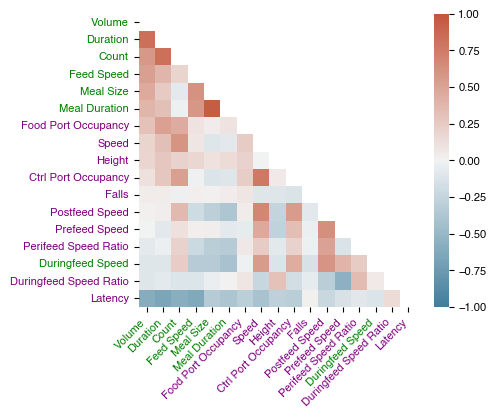

In [ ]:
vCorr, ax, corrmat = corrWith(w1118.iloc[:, 5::], 'Volume', metricType)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha = 'right');

vCorr.savefig(figurepath+ 'corr_all'+'.svg', dpi = 300)
vCorr.savefig(figurepath+ 'corr_all'+'.png', dpi = 300)

# vCorr, ax, corrmat = corrWith(data_num0.iloc[:, 5::], 'Volume', metricType, abs = True)

# vCorr.savefig(figurepath+ 'corr0'+'.svg', dpi = 300)
# vCorr, ax, corrmat = corrWith(data_num24.iloc[:, 5::], 'Volume', metricType, abs = True)
# vCorr.savefig(figurepath+ 'corr24'+'.svg', dpi = 300)
# vCorr, ax, corrmat = corrWith(data_num48.iloc[:, 5::], 'Volume', metricType, abs = True)
# vCorr.savefig(figurepath+ 'corr48'+'.svg', dpi = 300)


In [ ]:
def confidence_ellipse(x, y, ax, n_std=3.0, plotVector = True, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    import numpy as np
    from matplotlib.patches import Ellipse
    import matplotlib.transforms as transforms
    import matplotlib.pyplot as plt
    import scipy

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    scale = [scale_x, scale_y]
    return scale, ax.add_patch(ellipse)

def regscatter(data, x, y, ax, n_std = 2, scatter = True, fit_reg = True, plotEllipse = False, showTitle = True, color = 'steelblue',  **kwargs):
    setFont('Helvetica', 9)
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)
    corrResults = scipy.stats.linregress(data[x], data[y])
    if showTitle:
        ax.set_title('r = ' + str(round(corrResults.rvalue, 2)))
    # ax.plot(data[x].mean(), data[y].mean(), 'r.', markersize = 10)
    scale = None
    if plotEllipse:
        scale, ellipse = confidence_ellipse(data[x], data[y],  ax, edgecolor= None, facecolor = 'red', alpha = 0.1, n_std = n_std)
    sns.regplot(x = x, y = y, data = data, ax = ax, scatter = scatter, scatter_kws={'s': 3}, fit_reg= fit_reg, color = color)

    return scale

def plotEigenVectors (data, x, y, ax, scale = [1, 1], plotVs = [0, 1], plotMean = True):
    import numpy as np
    import matplotlib.pyplot as plt
    
    xData = data[x].values
    yData = data[y].values
    xData = np.reshape(xData, (len(xData), 1))
    yData = np.reshape(yData, (len(yData), 1))
    data = np.hstack((xData, yData))
    mu = data.mean(axis=0)
    data = data - mu
    # data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
    eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
    projected_data = np.dot(data, eigenvectors)
    sigma = projected_data.std(axis=0).mean()
    colors = ['steelblue', 'seagreen']
    angles = [0, 0]
    for i in plotVs:
        start, end = mu - scale[i] * 2 * eigenvectors[i], mu + scale[i] * 2 * eigenvectors[i]
        ax.plot([start[0], end[0]], [start[1], end[1]], color = colors[i] ) 
        # print(start)
        angles[i] = angle_between(eigenvectors[i], [[0, 1], [0, 0]])
    ax.set_aspect('equal')
    ax.text(ax.get_xlim()[1]*0.7,ax.get_ylim()[1]*0.9, r'$\Theta = %.2f ^\circ$' % angles[0])
    if plotMean:
        ax.plot(mu[0], mu[1], 'ro')

    return angles

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return 180-np.degrees(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)))[1]



def plotScatterGroupBy(data, Metric, yMetric, group_by = None):
    for i in range(len(datasets)):
        conditions = data[group_by].unique()
        datasets[i] = data.loc[data[group_by]==conditions[i]]
    
    fig, axes = plt.subplots(len(datasets), 1, figsize = [5, 8])

    for i in axes:
        i.set_ylim(-0.2, 1.5)
        i.set_xlim(-0.5, 3)
    for i in range(len(datasets)):
        scale = regscatter(datasets[i], x = xMetric, y = yMetric, ax = axes[i], color = 'k')
        angles = plotEigenVectors(datasets[i], x = xMetric, y = yMetric, ax = axes[i], scale = scale, plotVs = [0])
    # scale = regscatter(dark, x = xMetric, y = yMetric, ax = axes[3], color = 'k')
    # angles = plotEigenVectors(dark, x = xMetric, y = yMetric, ax = axes[3], scale = scale, plotVs = [0])
    fig.tight_layout()
    fig.savefig('speedvolumeellipses.png', dpi = 300)



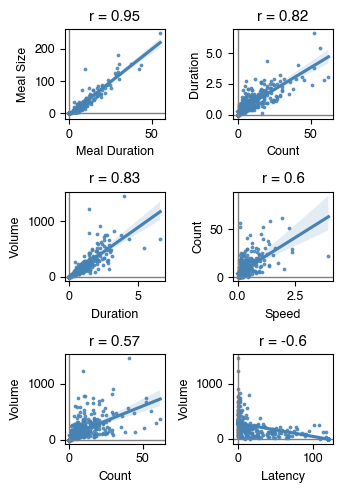

In [ ]:
f, ax = plt.subplots(3, 2)
f.set_size_inches(3.5, 5)
setFont('Helvetica', 6)
scale = regscatter(w1118.iloc[:, 5::], x = 'Meal Duration', y = 'Meal Size', ax = ax[0, 0], color = 'steelblue')
scale = regscatter(w1118.iloc[:, 5::], x = 'Duration', y = 'Volume', ax = ax[1, 0], color = 'steelblue')
scale = regscatter(w1118.iloc[:, 5::], x = 'Latency', y = 'Volume', ax = ax[2, 1], color = 'steelblue')
scale = regscatter(w1118.iloc[:, 5::], x = 'Count', y = 'Volume', ax = ax[2, 0], color = 'steelblue')
scale = regscatter(w1118.iloc[:, 5::], x = 'Count', y = 'Duration', ax = ax[0, 1], color = 'steelblue')
scale = regscatter(w1118.iloc[:, 5::], x = 'Speed', y = 'Count', ax = ax[1, 1], color = 'steelblue')
f.tight_layout()
f.savefig(figurepath+ 'cooreg'+'.svg', dpi = 300)

# angles = plotEigenVectors(w1118.iloc[:, 5::], x = 'Duration', y = 'Volume', ax = ax, scale = scale, plotVs = [0])


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 62.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

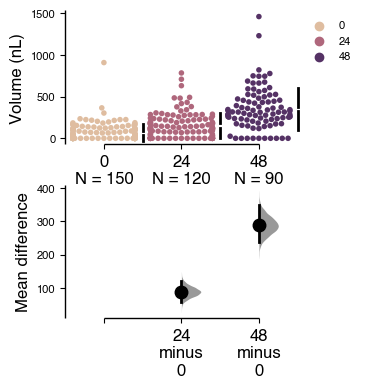

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

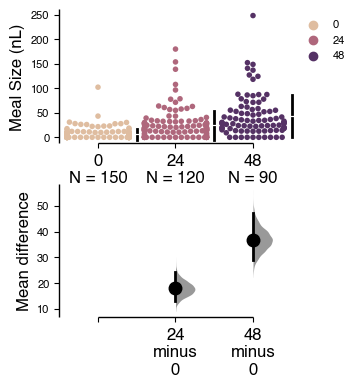

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

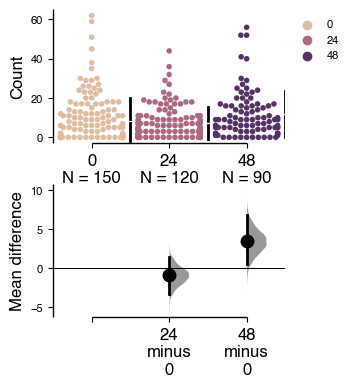

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

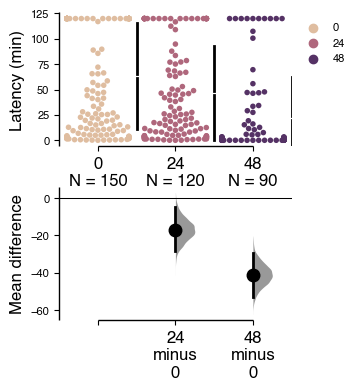

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/ana

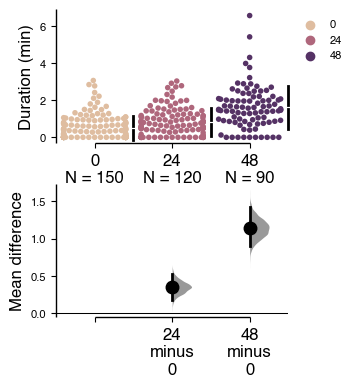

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 50.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 50.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

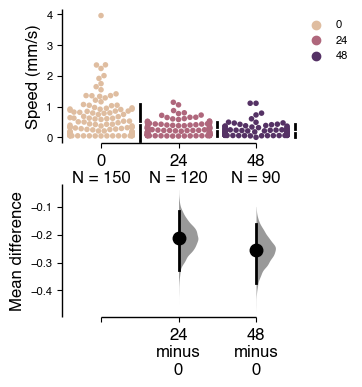

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

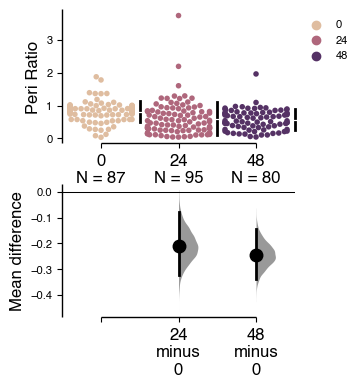

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

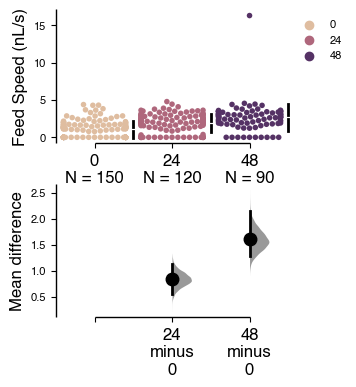

In [ ]:
WTStarvedPalette = {'0':sns.color_palette("magma")[5], '24':sns.color_palette("magma")[3], '48':sns.color_palette("magma")[1]}
setFont('Helvetica', 8)
vWT = dabest.load(w1118, x = 'Starvation', y = 'Volume', idx = ('0', '24', '48'))
fvWT = vWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Volume (nL)', custom_palette = WTStarvedPalette,  raw_marker_size=4, fig_size = (3, 4))
fvWT.savefig(figurepath+ 'vWT'+'.svg')

msWT = dabest.load(w1118, x = 'Starvation', y = 'Meal Size', idx = ('0', '24', '48'))
fmsWT = msWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Meal Size (nL)', custom_palette = WTStarvedPalette,  raw_marker_size=4, fig_size = (3, 4))
fmsWT.savefig(figurepath+ 'msWT'+'.svg')

cWT = dabest.load(w1118, x = 'Starvation', y = 'Count', idx = ('0', '24', '48'))
fcWT = cWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Count', custom_palette = WTStarvedPalette,  raw_marker_size=4, fig_size = (3, 4))
fcWT.savefig(figurepath+ 'cWT'+'.svg')

lWT = dabest.load(w1118, x = 'Starvation', y = 'Latency', idx = ('0', '24', '48'))
flWT = lWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Latency (min)', custom_palette = WTStarvedPalette,  raw_marker_size=4, fig_size = (3, 4))
flWT.savefig(figurepath+ 'lWT'+'.svg')

dWT = dabest.load(w1118, x = 'Starvation', y = 'Duration', idx = ('0', '24', '48'))
fdWT = dWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Duration (min)', custom_palette = WTStarvedPalette,  raw_marker_size=4, fig_size = (3, 4))
fdWT.savefig(figurepath+ 'dWT'+'.svg')

spWT = dabest.load(w1118, x = 'Starvation', y = 'Speed', idx = ('0', '24', '48'))
fspWT = spWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Speed (mm/s)', custom_palette = WTStarvedPalette,  raw_marker_size=4, fig_size = (3, 4))
fspWT.savefig(figurepath+ 'spWT'+'.svg')

periWT = dabest.load(w1118, x = 'Starvation', y = 'Perifeed Speed Ratio', idx = ('0', '24', '48'))
fperiWT = periWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Peri Ratio', custom_palette = WTStarvedPalette,  raw_marker_size=4, fig_size = (3, 4))
fperiWT.savefig(figurepath+ 'periRatioWT'+'.svg')

fsWT = dabest.load(w1118, x = 'Starvation', y = 'Feed Speed', idx = ('0', '24', '48'))
ffsWT = fsWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Feed Speed (nL/s)', custom_palette = WTStarvedPalette,  raw_marker_size=4, fig_size = (3, 4))
ffsWT.savefig(figurepath+ 'fsWT'+'.svg')




In [ ]:
## from svgutils.compose import *

Figure("24cm", "30cm", 
    Panel(SVG(figurepath + 'vials.svg').scale(0.015),
    Text("A", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(1, 1),
    Panel(SVG(figurepath + 'starvationtimeline.svg').scale(0.04),
    Text("B", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold')).move(9, 1),
    Panel(SVG(figurepath + 'corr_all.svg').scale(0.035),
    Text("C", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(1, 6),
    Panel(SVG(figurepath + 'cooreg.svg').scale(0.03),
    Text("Di", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold'), 
    Text("Dii", 4.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') , 
    Text("Diii", 0.2, 3.8, size=0.6, font = 'Helvetica', weight='bold'),  
    Text("Div", 4.2, 3.8, size=0.6, font = 'Helvetica', weight='bold'),  
    Text("Dv", 0.3, 7.4, size=0.6, font = 'Helvetica', weight='bold'),  
    Text("Dvi", 4.2, 7.4, size=0.6, font = 'Helvetica', weight='bold'),  
      ).move(13, 6),
    Panel(SVG(figurepath + 'vWT.svg').scale(0.02),
    Text("E", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(1, 16.5),
    Panel(SVG(figurepath + 'dWT.svg').scale(0.02),
    Text("F", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(6, 16.5),
    Panel(SVG(figurepath + 'msWT.svg').scale(0.02),
    Text("G", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(11, 16.5),
    Panel(SVG(figurepath + 'fsWT.svg').scale(0.02),
    Text("H", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(16, 16.5),
    Panel(SVG(figurepath + 'cWT.svg').scale(0.02),
    Text("I", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(1, 22.5),
    Panel(SVG(figurepath + 'spWT.svg').scale(0.02),
    Text("J", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(6, 22.5),
    Panel(SVG(figurepath + 'lWT.svg').scale(0.02),
    Text("K", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(11, 22.5),
    Panel(SVG(figurepath + 'periRatioWT.svg').scale(0.02),
    Text("L", 0.2, 0.2, size=0.6, font = 'Helvetica', weight='bold') ).move(16, 22.5),
      ).save(figurepath+"/Figure2.svg")



## 

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anac

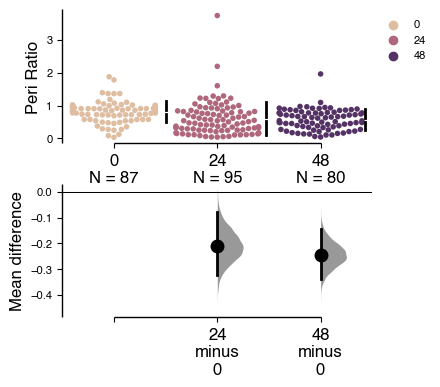

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 57.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 57.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

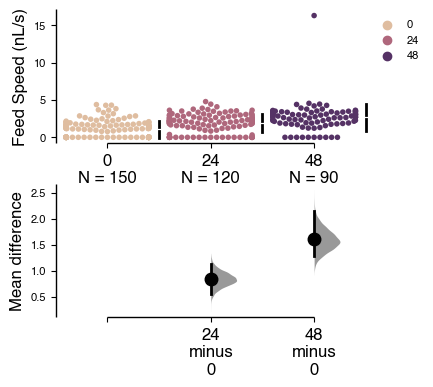

# | hide
import nbdev; nbdev.nbdev_export()